## 4. Transformada discreta de Fourier

A transformada discreta de Fourier transforma uma sequência de sinais uniformemente espaçados em informações sobre a frequência de todas as ondas senoidais necessárias para formar o sinal no domínio do tempo ([Chapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/494)). 

O intervalo de $0$ a $t$ é dividido em $N$ subintervalos com largura $\Delta t = \frac{T}{N}$ em que $f_n$ designa o valor da função $f(t)$ no instante $t_n$.

A transformada de Fourier discreta pode ser escrita como



$$
F_k=\sum_{n=0}^{N-1} f_n e^{-i k \omega_0 n} \quad \text { para } k=0 \text { a } N-1
$$

e a transformada inversa de Fourier como

$$
f_n=\frac{1}{N} \sum_{k=0}^{N-1} F_k e^{i k \omega_n n} \quad \text { para } n=0 \text { a } N-1
$$

onde $\omega_0=2 \pi / N$.

 

* $N$ = número total de amostras 
* $n$ = índice da amostra
* $k$ = frequência, onde $ k\in [0,N-1]$
* $f_n$ = o valor da função (ou do sinal) em $t_n$
* $F_k$ = amplitude e fase da transformada


Usando a *Fórmula de Euler*

$$ e^{ \pm i a}=\cos a \pm i \operatorname{sen} a $$

podemos escrever a tansformada discreta de Fourier na forma trigonométrica como

$$
F_k=\frac{1}{N} \sum_{n=0}^N\left[f_n \cos \left(k \omega_0 n\right)-i f_n \operatorname{sen}\left(k \omega_0 n\right)\right.
$$

e 

$$
f_n=\sum_{k=0}^{N-1}\left[F_k \cos \left(k \omega_0 n\right)-i F_k \operatorname{sen}\left(k \omega_0 n\right)\right.
$$

Aqui,o fator de escala $1/N$ foi inserido na equação da transformada e não na da inversa.

Observe que $F_k$ é um número complexo que codifica as informações de amplitude e fase de um componente senoidal complexo $e^{i2\pi kn/N}$
do valor de $f_n$

A amplitude e a fase do sinal podem ser calculadas como:

$$Amp = \frac{|F_k|}{N}= \frac{\sqrt{Re(F_k)^2 + Im(F_k)^2}}{N}$$

$$\phi = arctan \bigg( \frac{Im(F_k)}{ Re(F_k)}\bigg)$$

**Exemplo 1:** Neste exemplo, vamos criar um sinal com a soma de três ondas senoidais, cada uma com a forma com $f(t) = A \text{ sen}(2\pi \omega t)$. A amplitudes das ondas serão $A_1=3$, $A_2=1$ e $A_3=0.5$ e as frequências angulares serão $\omega_1=1$, $\omega_2=4$ e  $\omega_3=7$. Então, vamos aplicar a transformada de Fourier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,2)

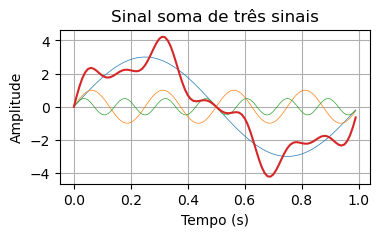

In [2]:
sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)

t = np.linspace(0,1,100, endpoint=False)

x1 = sinal(3,1,t)
x2 = sinal(1,4,t)
x3 = sinal(0.5,7,t)
x = x1+x2+x3

plt.plot(t, x1, t, x2, t, x3, lw=0.5)
plt.plot(t, x)

plt.xlabel( 'Tempo (s)' ) 
plt.ylabel( 'Amplitude' ) 
plt.title( 'Sinal soma de três sinais' ) 
plt.grid()
plt.show()

Transformada discreta de Fourier pela fórmula

In [3]:
N = len(x)
n = np.arange(N)
F = np.zeros(N, dtype=complex)

In [4]:
for k in range(N):
    F[k] = np.sum(x*np.exp(-1j*2*np.pi*k*n/N))

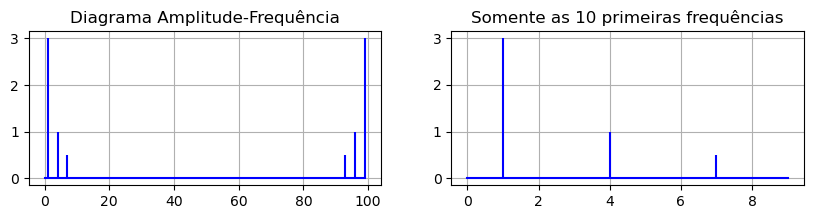

In [5]:
freq = np.arange(len(F))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
ax1.set_title('Diagrama Amplitude-Frequência')
ax1.stem(freq, abs(F)/(N/2), 'b', markerfmt=" ", basefmt="-b")
ax1.grid()

ax2.set_title('Somente as 10 primeiras frequências')
ax2.stem(freq[0:10], abs(F[0:10])/(N/2), 'b', markerfmt=" ", basefmt="-b")
ax2.grid()

plt.show()


A Transformada Discreta de Fourier (TDF) de um sinal real produz um espectro duplicado ou espelhado porque  utiliza exponenciais complexas para decompor o sinal. Para que o resultado da soma dessas exponenciais complexas seja um sinal puramente real (sem parte imaginária), as frequências positivas e negativas devem vir em pares que se complementam, cancelando suas partes imaginárias.

Na prática, por causa dessa duplicação de informações, ao analisar o espectro de um sinal real, normalmente olhamos apenas para a primeira metade do gráfico, pois a segunda metade é redundante.

**Exercício 1:** Com base no Exemplo 1, use os dados abaixo, de um sinal discreto, para reconstruir a função mostrada na figura a seguir aplicando a transformada discreta de Fourier.

In [6]:
x = np.array([ 0.00000000e+00,  1.08151959e+01,  1.79317379e+01,  1.91439262e+01,
        1.45948918e+01,  6.63804775e+00, -1.21852574e+00, -5.81112704e+00,
       -5.60660172e+00, -1.22880644e+00,  4.97254225e+00,  1.00795208e+01,
        1.19433043e+01,  1.00918192e+01,  5.81307613e+00,  1.40916538e+00,
       -1.00000000e+00, -5.41737840e-01,  1.98624181e+00,  4.53611686e+00,
        4.87223646e+00,  1.76482465e+00, -4.26625307e+00, -1.10366592e+01,
       -1.56066017e+01, -1.56189798e+01, -1.04573211e+01, -1.67664837e+00,
        7.52382401e+00,  1.35882239e+01,  1.41049036e+01,  8.86429267e+00,
        1.18790740e-14, -8.86429267e+00, -1.41049036e+01, -1.35882239e+01,
       -7.52382401e+00,  1.67664837e+00,  1.04573211e+01,  1.56189798e+01,
        1.56066017e+01,  1.10366592e+01,  4.26625307e+00, -1.76482465e+00,
       -4.87223646e+00, -4.53611686e+00, -1.98624181e+00,  5.41737840e-01,
        1.00000000e+00, -1.40916538e+00, -5.81307613e+00, -1.00918192e+01,
       -1.19433043e+01, -1.00795208e+01, -4.97254225e+00,  1.22880644e+00,
        5.60660172e+00,  5.81112704e+00,  1.21852574e+00, -6.63804775e+00,
       -1.45948918e+01, -1.91439262e+01, -1.79317379e+01, -1.08151959e+01])

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/TDF_sinal.png" width="480" align="left">

**Exercício 2:** Agora considere use os dados ruidosos abaixo e aplique a transformada discreta de Fourier para reconstruir a função dezprezando as componentes do sinal com baixas amplitudes (ruídos). Plote o sinal "limpo" e os dados no mesmo gráfico.

In [7]:
x = np.array([ 0.33721342,  0.93538912,  2.30538064,  2.36193728,  1.89039184,
        2.30493716,  2.20280179,  1.97249438,  2.16763613,  1.6085374 ,
        2.28503645,  2.25508502,  1.66087371,  2.30197562,  2.06647932,
        2.39069034,  2.73580368,  2.82733693,  3.23058639,  3.97426104,
        4.22939749,  4.63898048,  3.13978223,  2.84594685,  1.98265061,
        0.72532871,  0.48075875,  0.16804384,  0.12383414,  0.61395264,
        0.71270595, -0.03298844,  0.04954197,  0.34578161, -0.6614217 ,
       -0.35193006, -0.31190664, -0.74181312, -0.57288383, -0.81949322,
       -1.76678333, -2.32958233, -3.65553297, -4.26213607, -3.87440068,
       -4.24162163, -3.9702788 , -2.89257261, -2.19815782, -2.36418834,
       -2.4672634 , -1.82686269, -2.34701495, -2.14176392, -2.30307121,
       -1.7991681 , -1.47593024, -2.28856175, -1.58406178, -2.40938314,
       -2.24845699, -2.37714939, -1.94413667, -1.4836069 ])

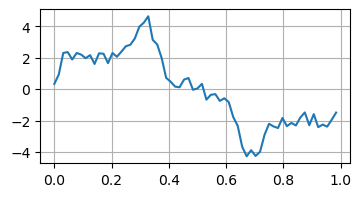

In [8]:
t = np.linspace(0,1, len(x), endpoint=False)
plt.plot(t, x)
plt.grid()
plt.show()

### Transformada Rápida de Fourier

Embora o algoritmo descrito no exemplo anterior calcule adequadamente a TDF, ele é computacionalmente pesado, pois são necessárias $N^2$ operações. Consequentemente, para amostra de dados mesmo de tamanho moderado, a determinação direta da TFD pode gastar muito tempo.
A transformada rápida de Fourier, ou FFT, é um algoritmo que foi desenvolvido para calcular a TFD de uma forma extremamente econômica. Sua velocidade vem do fato de que ela utiliza os resultados dos cálculos anteriores para reduzir o número de operações. Em particular, ela explora a periodicidade e a simetria das funções trigonométricas para calcular a transformada com aproximadamente $N log2 N$ operações. Logo, para N = 50 amostras, a FFT é da ordem de 10 vezes mais rápida do que a TFD padrão. Para N = 1000, é cerca de 100 vezes mais rápida.

O módulo `numpy.fft` inclui um conjunto básico de rotinas para transformada de Fourier discreta, o módulo   `scipy.fft`contém um conjunto mais abrangente.

A função `fft`calcula a Transformada de Fourier discreta para $n$ pontos amostrais. A função `rfft` retorna a primeira metade dos dados transformados, omitindo a parte simétrica. As funções `fftfreq` e `rfftfreq` retornam as frequências das amostras e a metade das frequências, respectivamente. 

In [9]:
from numpy.fft import fft,rfft,fftfreq,rfftfreq,fftshift
from numpy.fft import hfft

In [10]:
# reproduzindo os dados do Exemplo 1
sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)
t = np.linspace(0,1,100, endpoint=False)
x1 = sinal(3,1,t)
x2 = sinal(1,4,t)
x3 = sinal(0.5,7,t)
x = x1+x2+x3

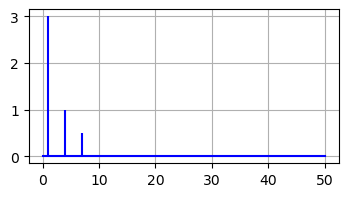

In [11]:
N = len(x)

An = rfft(x)
freq = rfftfreq(N,1/N)

plt.stem(freq , abs(An)/(N/2),'b',  markerfmt=" ", basefmt="-b")
plt.grid()
plt.show()

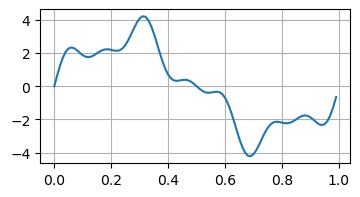

In [12]:
# aplicando a inversa
from scipy.fft import irfft

f = irfft(An)

plt.plot(t,f)
plt.grid()
plt.show()

**Exemplo2: (Removendo frequências indesejadas)** Primeiramente vamos criar um sinal simples com uma única função senoidal. Então, vamos analizar o espectro de amplitudos do sinal "limpo". Depois, vamos adicionar um ruído randômico ao sinal e ver como fica o espectro de aplitudes e, por fim recuperar o sinal removendo frequências indesejadas.

In [36]:
# criando um sinal
t = np.arange(0, 1, 0.001) #Começo, fim, passo
s = np.sin(2*np.pi*10*t) # A=1, w0=10

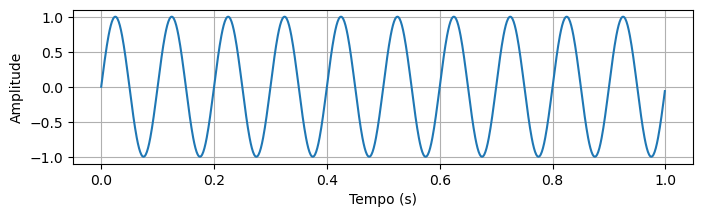

In [37]:
# plotando
fig, ax = plt.subplots(figsize = (8,2))
ax.plot(t, s)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
ax.grid()

Aplicando a transformada de Fourier e plotando o espectro.

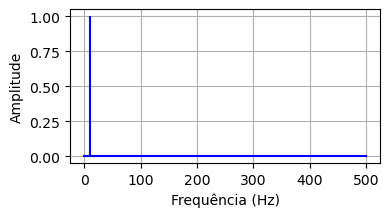

In [15]:
from scipy.fft import fft, fftfreq

N = len(s)
dt = 1/len(s)

# Aplica a transformada rápida
F = rfft(s)

# Pega o módulo e normaliza
amps = np.abs(F/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

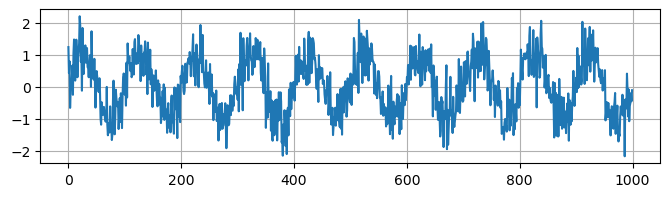

In [41]:
# Criando um ruido no sinal
sr = s+0.5*np.random.randn(len(s))
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(sr)
plt.grid()
plt.show()

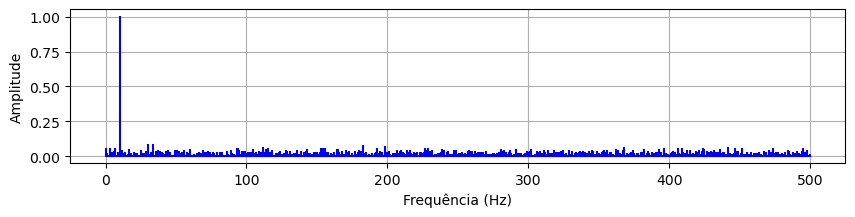

In [42]:
# Aplica a transformada rápida
Fr = rfft(sr)

# Pega o módulo e normaliza
amps = np.abs(Fr/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

In [48]:
# identificando a frequência com maior amplitude
amps = np.abs(Fr/(N/2))
np.argmax(amps)

10

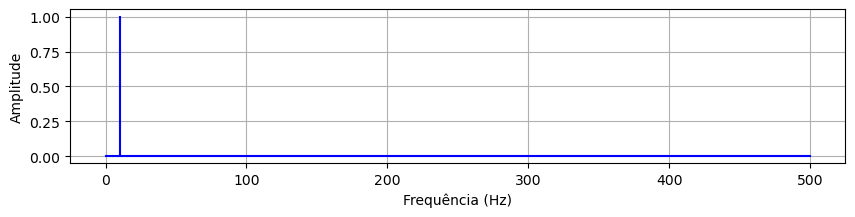

In [51]:
Fr = np.where(amps<0.5,0,Fr)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

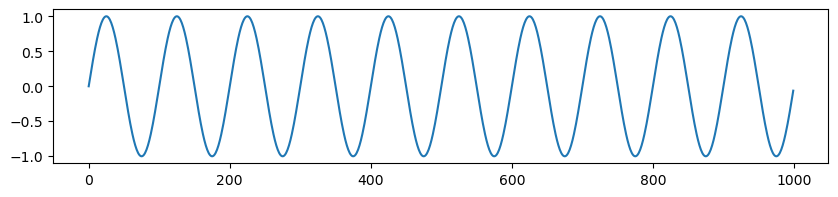

In [52]:
# aplicando a inversa
from scipy.fft import irfft

# Obtendo o sinal filtrado com a inversa
sf = irfft(Fr)

plt.plot(sf)
plt.show()

### Eliminando frequências indesejadas em dados


In [20]:
plt.rcParams['figure.figsize'] = [10,2]

In [21]:
# Discretizando o tempo
dt = 0.001
t = np.arange(0, 1, dt)

# Criando um sinal
s = np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)

# Inserindo um ruido
sr = s + 2.5 * np.random.randn(len(t)) 
#min_signal, max_signal = signal.min(), signal.max()

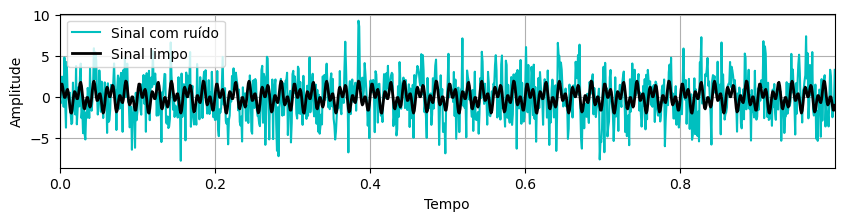

In [22]:
# Plotando
plt.plot(t, sr, color='c', linewidth=1.5, label='Sinal com ruído')
plt.plot(t, s, color='k', linewidth=2, label='Sinal limpo')
plt.xlim(t[0], t[-1])
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

Aplicando a transformada de Fourier e obtendo o espectro de frequências

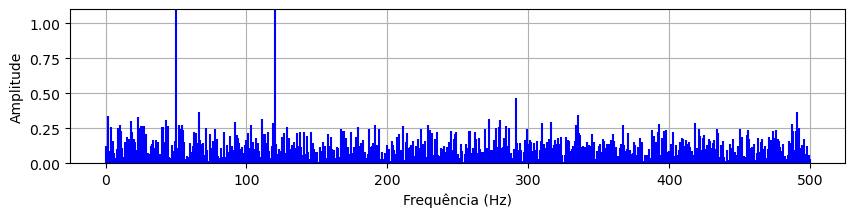

In [23]:
# Aplica a transformada rápida
Fr = rfft(sr)

# Pega o módulo e normaliza
amps = np.abs(Fr/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,1.1)
ax.grid()

In [24]:
# Pegando as freq com amps>0.5 (limiar)
amps_idxs = amps < 0.5 
Fr[amps_idxs] = 0
amps = np.abs(Fr/(N/2))

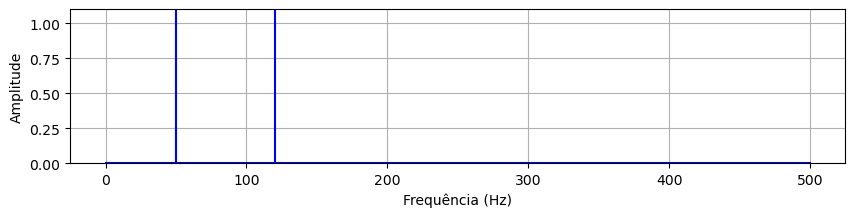

In [25]:
# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,1.1)
ax.grid()

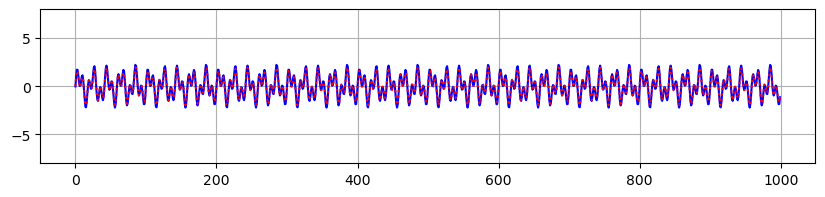

In [26]:
# Obtendo o sinal filtrado com a inversa
sf = irfft(Fr)

plt.plot(sf, 'b')
plt.plot(s, 'r:')
plt.ylim(-8,8)
plt.grid()
plt.show()

**Lendo dados em arquivo externo**

Os dados podem ser baixados [neste link](https://github.com/tiagoburiol/MatComp_IV/tree/main/dados).

In [27]:
data = np.genfromtxt('dados/amps.dat')
dt = 0.001
t = np.arange(0, 1, dt)

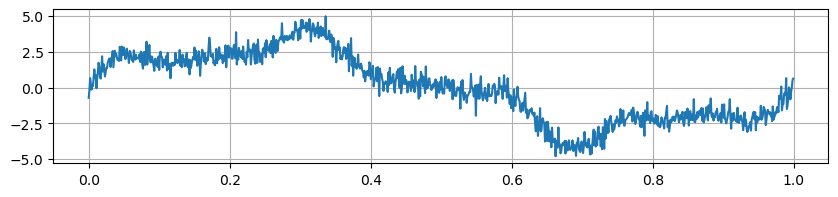

In [28]:
plt.plot(t, data)
plt.grid()
plt.show()

**Atividade:**

Aplicar a transformada discreta de Fourier para o sinal mostrado acima, identificar as frequências ruidosas e filtrar os dados. 

## Referências

CHAPRA, Steven, C. e Raymond P. CANALE. Métodos numéricos para engenharia . Disponível em: Minha Biblioteca, (7ª edição). Grupo A, 2016. 

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1

YANG, Won Young; CAO, Wenwu; CHUNG, Tae-Sang; MORRIS, John. Applied Numerical Methods Using MATLAB. Hoboken: Wiley-Interscience, John Wiley & Sons, Inc., 2005. ISBN 0-471-69833-4.
